In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import userlib.util as tools
from datetime import datetime
import matplotlib as mpl

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.dpi'] = 80


In [ ]:

# ================ Used for constructing the samples to be measured ================
n_jobs = 61
epochs = 6
ground_truth_mc_times = [100, 1000, 10000]
ground_truth_samples = [200, 400, 800, 1600, 3200]
ground_truth_fbin = [0.1, 0.3, 0.5, 0.7, 0.9]
ground_truth_epsilon = [0.1, 0.5, 1.0, 2.0, 4.0]
#===================================================================================

# ======================== Used for parameter scanning ========================
par_intv = 0.1
grid_pi = np.round(np.arange(-3, 3.00 + par_intv, par_intv), 3)
grid_pi[ grid_pi == -1.] = -1.001
grid_kappa = np.round([0.0], 3)
grid_eta = np.round([0.0], 3)
fbin_intv = 0.01
grid_fbin = np.round(np.arange(0.01, 1.0 + fbin_intv, fbin_intv), 2)
#===============================================================================


In [ ]:
mc_order = 4
mc_coefficent = 1.0
results_path = './results/n_jobs(61)/mc_times(10^%ix1.0)/'
S13_results_path = results_path + 'S13/'
HBM_results_path = results_path + 'HBM/'
DVCD_results_path = results_path + 'DVCD/'
sub_path_str = 'epsilon(%.01f)/samples(%i)/fbin(%.01f)/epochs(%02i)/pi_kappa_eta(%.01f, %.01f, %.01f)/'

pic_data_sub_path = 'picData/'
fn_running_time = 'running_time.txt'

fn_grid_pi = 'grid_pi.npy'
fn_positions_pi = 'positions_pi.npy'
fn_likelihood_pi = 'likelihood_pi.npy'

fn_grid_fbin = 'grid_fbin.npy'
fn_positions_fbin = 'positions_fbin.npy'
fn_likelihood_fbin = 'likelihood_fbin.npy'

figures_path = './figures/'

def loadPositions(rel_path):
    pos_fbin =  np.load(rel_path + fn_positions_fbin)
    grid_fbin = np.load(rel_path + fn_grid_fbin)
    
    pos_pi =  np.load(rel_path + fn_positions_pi)
    grid_pi = np.load(rel_path + fn_grid_pi)

    return grid_fbin[pos_fbin], grid_pi[pos_pi]

In [67]:
# exploration of accuracy of S13 under different (mc_times)
ep = 1.0
fbin = 0.3
epochs = 6
samples = 200
mc_order = [2,3,4]
pi, kappa, eta = 0.0, 0.0, 0.0
positions_fbin = []
positions_pi = []
for mo in mc_order:
    rel_path = S13_results_path % mo + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta) + pic_data_sub_path
    data = loadPositions(rel_path);positions_fbin.append(data[0]);positions_pi.append(data[1])

print (positions_fbin)
print (positions_pi)

[array([0.19, 0.2 , 0.36, 0.55]), array([0.45, 0.23, 0.38, 0.53]), array([0.47, 0.23, 0.37, 0.54])]
[array([ 0. , -0.5,  0. ,  1.2]), array([-0.3, -0.4,  0.1,  1.4]), array([-0.2, -0.4,  0.2,  1.4])]


In [57]:
# exploration of accuracy of S13 under different (fbin)
ep = 1.0
epochs = 6
mc_order = 4
pi, kappa, eta = -0.5, 0.0, 0.0
samples = 200
positions_fbin = []
positions_pi = []
for fbin in ground_truth_fbin:
    rel_path = S13_results_path % mc_order + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta) + pic_data_sub_path
    data = loadPositions(rel_path);positions_fbin.append(data[0]);positions_pi.append(data[1])

print (positions_fbin)
print (positions_pi)

[array([0.07, 0.06, 0.13, 0.22]), array([0.16, 0.17, 0.3 , 0.46]), array([0.57, 0.41, 0.54, 0.69]), array([0.89, 0.62, 0.77, 0.89]), array([1.  , 0.68, 0.81, 0.97])]
[array([ 2.4, -0.2,  1.3,  2.5]), array([-0.3, -0.8, -0.4,  0.1]), array([-0.5, -0.5, -0.2,  0.3]), array([-0.4, -0.5, -0.3, -0.1]), array([-0.5, -0.6, -0.5, -0.3])]


In [62]:
# exploration of accuracy of S13 under different (samples)
ep = 1.0
epochs = 6
mc_order = 4
pi, kappa, eta = -1.5, 0.0, 0.0
positions_fbin = []
positions_pi = []
for samples in ground_truth_samples:
    rel_path = S13_results_path % mc_order + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta) + pic_data_sub_path
    data = loadPositions(rel_path);positions_fbin.append(data[0]);positions_pi.append(data[1])

print (positions_fbin)
print (positions_pi)

[array([0.55, 0.46, 0.52, 0.59]), array([0.56, 0.46, 0.51, 0.56]), array([0.51, 0.47, 0.5 , 0.51]), array([0.52, 0.48, 0.5 , 0.52]), array([0.49, 0.48, 0.5 , 0.53])]
[array([-1.4, -2.5, -1.8, -1.4]), array([-1.4, -2.1, -1.7, -1.4]), array([-1.5, -1.9, -1.6, -1.5]), array([-1.6, -1.9, -1.7, -1.5]), array([-1.6, -1.7, -1.6, -1.5])]


In [63]:
# exploration of accuracy of S13 under different (pi|kappa=0, eta=0)
ep = 1.0
fbin = 0.5
epochs = 6
samples = 200
ground_truth_pi, kappa, eta = [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5], 0.0, 0.0
running_time = []
for pi in ground_truth_pi:
    rel_path = S13_results_path % mc_order + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta) + pic_data_sub_path
    data = loadPositions(rel_path);positions_fbin.append(data[0]);positions_pi.append(data[1])

print (positions_fbin)
print (positions_pi)

FileNotFoundError: [Errno 2] No such file or directory: './results/n_jobs(61)/mc_times(10^4x1.0)/S13/epsilon(1.0)/samples(200)/fbin(0.5)/epochs(06)/pi_kappa_eta(-1.0, 0.0, 0.0)/picData/positions_fbin.npy'

[array(56702.468), array(115780.839), array(231768.36), array(461494.638), array(1003467.053)]
[array(7.003), array(7.571), array(9.286), array(11.905), array(17.199)]


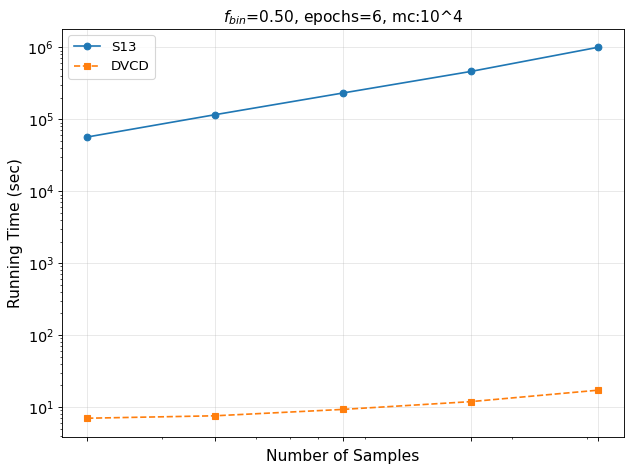

In [ ]:
# Running times of S13 and DVCD under different (samples)
ep = 1.0
fbin = 0.5
epochs = 6
mc_order = 4
pi, kappa, eta = 0.0, 0.0, 0.0
running_time_S13 = []
running_time_DVCD = []
for samples in ground_truth_samples:
    fn_S13 = S13_results_path % mc_order \
        + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta)\
        + pic_data_sub_path\
        + fn_running_time
    running_time_S13.append(np.loadtxt(fn_S13))

    fn_DVCD = DVCD_results_path % mc_order \
        + sub_path_str % (ep, samples, fbin, epochs, pi, kappa, eta)\
        + pic_data_sub_path\
        + fn_running_time
    running_time_DVCD.append(np.loadtxt(fn_DVCD))

print (running_time_S13)
print (running_time_DVCD)
plt.figure(figsize=(8,6))
plt.plot(ground_truth_samples, running_time_S13, 'o-', label='S13', color='C0')
plt.plot(ground_truth_samples, running_time_DVCD, 's--', label='DVCD', color='C1')
# ax.xaxis.set_major_formatter(plt.ScalarFormatter())
# ax.xaxis.get_major_formatter().set_scientific(True)
# ax.yaxis.set_major_formatter(plt.ScalarFormatter())
# ax.yaxis.get_major_formatter().set_scientific(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(ground_truth_samples)
plt.xlabel('Number of Samples')
plt.ylabel('Running Time (sec)')
plt.title('$f_{bin}$=%.2f, epochs=%i, mc:10^%s'%(fbin, epochs, mc_order))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(figures_path+'running_time_S13_DVCD_epochs%i_mc10^%i.pdf'%(epochs, mc_order))
plt.show()
plt.close()